11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/60
1688/1688 [==============================] - 21s 11ms/step - loss: 0.6160 - accuracy: 0.8409 - val_loss: 0.3106 - val_accuracy: 0.9142
Epoch 2/60
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2916 - accuracy: 0.9170 - val_loss: 0.2462 - val_accuracy: 0.9332
Epoch 3/60
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2387 - accuracy: 0.9319 - val_loss: 0.2098 - val_accuracy: 0.9425
Epoch 4/60
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2042 - accuracy: 0.9420 - val_loss: 0.1854 - val_accuracy: 0.9480
Epoch 5/60
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1787 - accuracy: 0.9494 - val_loss: 0.1669 - val_accuracy: 0.9513
Epoch 6/60
1688/1688 [==============================] - 8s 4ms/step - loss: 0.1590 - accuracy: 0.9552 - val_loss: 0.1516 - val_accuracy: 0.9578
Epoch 7/60
1688/1688 [==============================] - 6s 4ms/step -

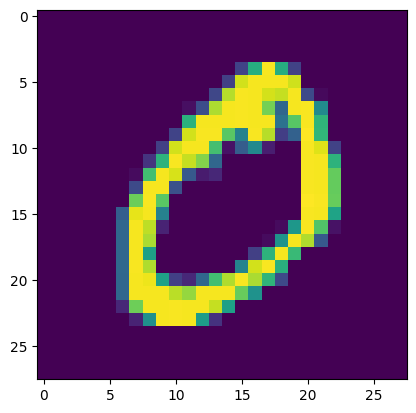

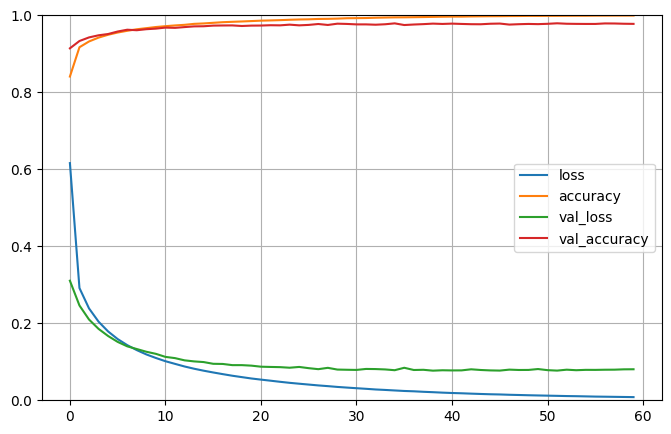

1/1 [==============================] - 0s 35ms/step


array([7, 2, 1, 0, 4])

In [1]:
# -*- coding: utf-8 -*-
"""7ann.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1TMELK-zHFzAqqAOo5zmfre5oCpSugaJ3
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

digit_mnist = keras.datasets.mnist
(x_train_full, y_train_full), (x_test, y_test) = digit_mnist.load_data()

x_train_full.shape
(60000, 28, 28)

plt.imshow(x_train_full[1])

x_train_n=x_train_full/255
x_test_n=x_test/255
x_valid,x_train=x_train_n[:6000],x_train_n[6000:]
y_valid,y_train=y_train_full[:6000],y_train_full[6000:]
x_test=x_test_n

np.random.seed(42)
tf.random.set_seed(42)

# Model Building
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(200,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
metrics=['accuracy'],
optimizer = 'sgd')

model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],
optimizer = 'sgd')

model_r = model.fit(x_train,y_train,epochs=60,
validation_data=(x_valid,y_valid))

model.evaluate(x_test,y_test)

pd.DataFrame(model_r.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

x_new=x_test[:5]
y_prob = model.predict(x_new)
y_prob.round(2)

predict_x = model.predict(x_new)
classes_x=np.argmax(predict_x,axis=1)

classes_x